In [1]:
import numpy as np
from sklearn import gaussian_process as gp
import matplotlib.pyplot as plt

In [2]:
# create some random input signal
l, N, dt, nu = 0.2, 1000, 0.001, 2
Ker = gp.kernels.RBF(length_scale=l)
x = np.linspace(0, (N-1)*dt, num=N)[:, None]
Kx = Ker(x)
L = np.linalg.cholesky(Kx+1e-13*np.eye(N))
us = np.random.normal(0, 1, size=(N, nu))
vs = np.dot(L,us)
e = vs

In [3]:
def rmse(e,e_hat):
    N = e.shape[0]
    rmse = np.squeeze(np.sqrt(1/N * np.sum([(e_k-e_hat_k).reshape(-1,1).T @ (e_k-e_hat_k).reshape(-1,1) for e_k, e_hat_k in zip(e,e_hat)])))
    print(f'RMSE = {rmse:.2g}')
    return rmse

def calculate_freqs(E, freqs, threshold_per = 0.1):
    magnitude = np.abs(E)
    threshold = threshold_per * np.max(magnitude)
    return freqs[(magnitude > threshold)[:,0]]

In [56]:
e_hat = e+np.random.normal(0,0.4, size=(N,1))

def plot_trajectories(e,e_hat, dt, name=None):
    N, nu = e.shape
    t = np.linspace(0,(N-1)*dt,N)
    for u_idx in range(nu):
        fig, ax = plt.subplots(figsize=(12,3))
        ax.plot(t,e[:,u_idx], label=f'$e_{u_idx+1}$')
        ax.plot(t,e_hat[:, u_idx], label=rf'$\hat e_{u_idx+1}$')
        ax.set_xlabel(f'time step $d_t = {dt}$s')
        ax.grid()
        ax.legend()

        if name is not None:
            tikzplotlib.save(f'{name}-output.tex')

In [57]:
def dft(x):
    N, nx = x.shape
    # compute the FFT
    D_fft = np.zeros_like(x)
    for n_idx in range(nx):
        D_fft[:,n_idx] = np.fft.fft(x[:, n_idx])
        freqs = np.fft.fftfreq(N, d=(t[1] - t[0]))  # calculate the frequency bins

    return D_fft, freqs

def plot_frequencies(E, E_hat, freqs):
    N, ne = E.shape
    for n_idx in range(ne):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(freqs[:N//2], np.abs(E[:N//2, n_idx]), label=f'$E_{n_idx+1}$')  # only plot the positive frequencies
        ax.plot(freqs[:N//2], np.abs(E_hat[:N//2, n_idx]), label=fr'$\hat E_{n_idx+1}$')  # only plot the positive frequencies
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Amplitude')
        ax.set_title('Frequency Spectrum')
        ax.grid()
        ax.legend()

    

In [58]:
def plot_frfs(D,E,E_hat, freqs, name=None):

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(freqs[:N//2], np.abs(E[:N//2]), label='$E$')
    ax.plot(freqs[:N//2], np.abs(E_hat[:N//2]), label=r'$\hat E$')
    ax.plot(freqs[:N//2], np.abs(D[:N//2]), label='$D$')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title('Frequency Spectrum')
    ax.legend()
    ax.grid()

    if name is not None:
        tikzplotlib.save(f'{name}-amplitude.tex')

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(freqs[:N//2], E[:N//2]/D[:N//2], label='FRF $E/D$')
    ax.plot(freqs[:N//2], E_hat[:N//2]/D[:N//2], label=r'FRF $\hat E/D$')
    # ax.set_ylim([0,10])
    # ax.set_xlim([1,21])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title('FRFs')
    ax.grid()
    ax.legend()

    if name is not None:
        tikzplotlib.save(f'{name}-frf.tex')

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(freqs[:N//2], 20*np.log10(np.abs(E[:N//2])), label=r'$20 \log_{10} (E)$')
    ax.plot(freqs[:N//2], 20*np.log10(np.abs(E_hat[:N//2])), label=r'$20 \log_{10} (\hat E)$')
    ax.plot(freqs[:N//2], 20*np.log10(np.abs(D[:N//2])), label=r'$20 \log_{10} (D)$')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(r'Bode')
    ax.legend()
    ax.grid()

    if name is not None:
        tikzplotlib.save(f'{name}-bode.tex')

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(np.angle(D[:N//2]), label='$arg(D)$')
    ax.plot(np.angle(E[:N//2]), label='$arg(E)$')
    ax.plot(np.angle(E_hat[:N//2]), label=r'$arg(\hat E)$')
    ax.legend()
    ax.set_xlabel('Phase')
    ax.grid()

    if name is not None:
        tikzplotlib.save(f'{name}-phase.tex')



In [59]:
import tikzplotlib
import os
fig_rel_path = './fig/frequency-analysis'

--- Time domain ---
RMSE = 0.71
--- Frequency domain ---
RMSE = 2.6
--- Bode ---
RMSE = 30


/var/folders/20/k44l3vsj03x1v_37v25mlp4w0000gn/T/ipykernel_61518/3370444267.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  D_fft[:,n_idx] = np.fft.fft(x[:, n_idx])


29.888829573733755

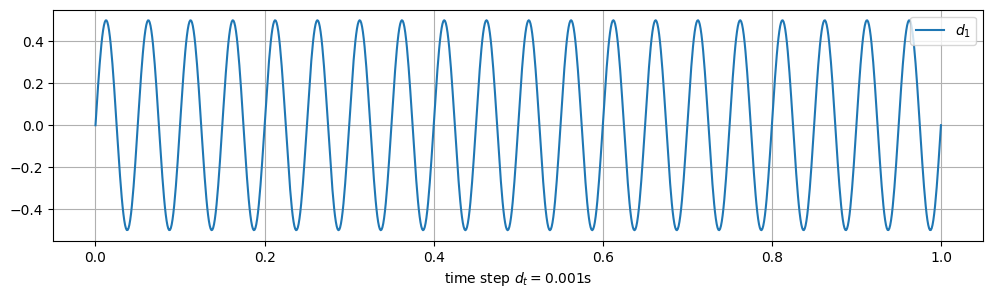

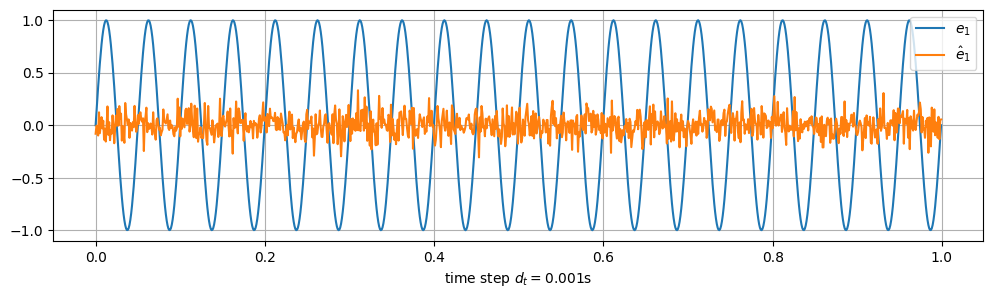

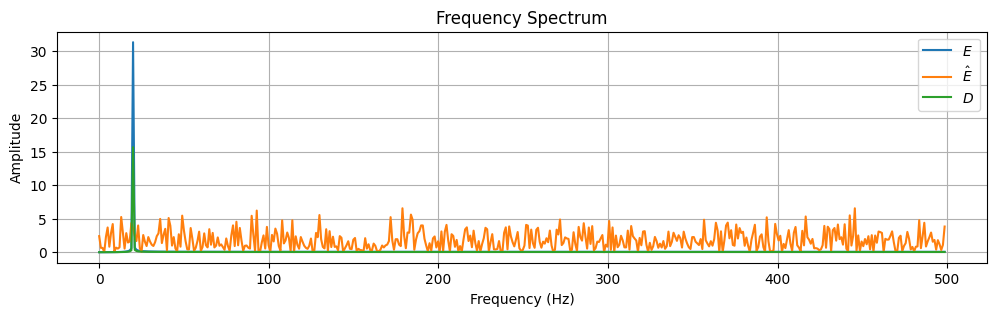

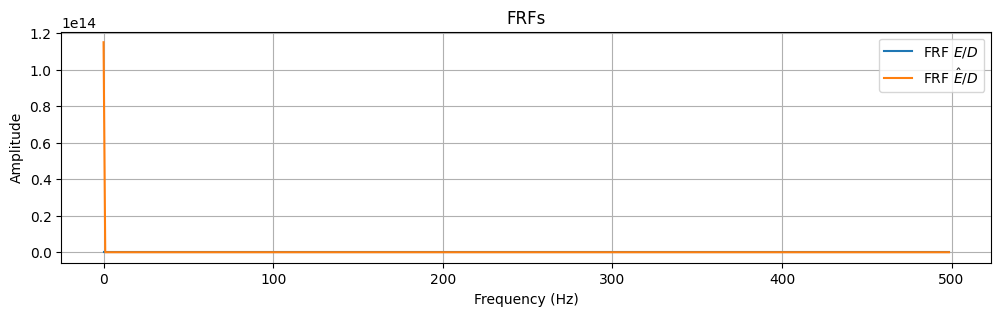

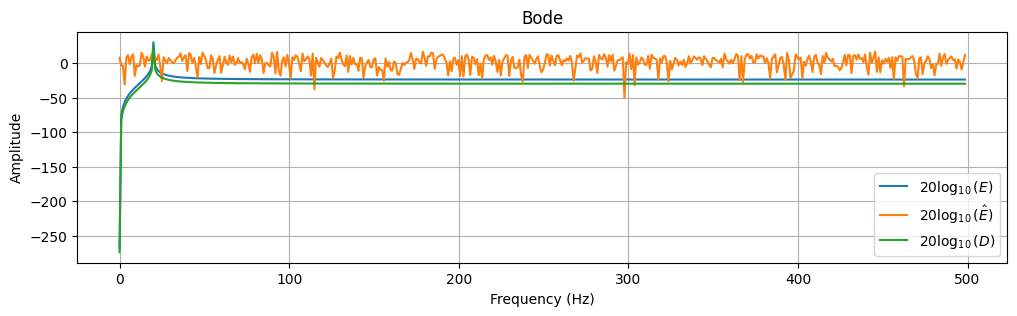

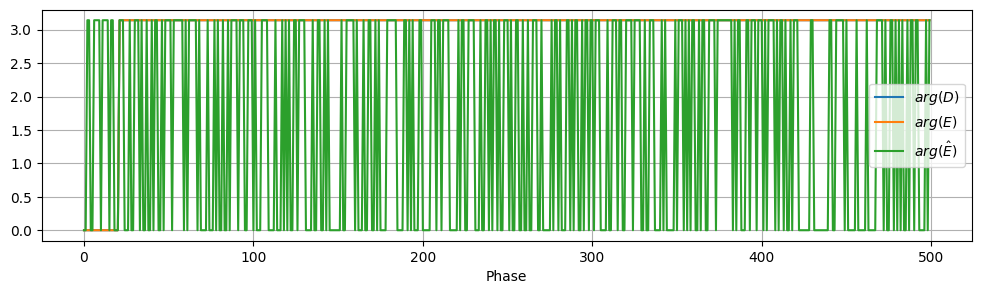

In [62]:

t = np.linspace(0,1,N)
sin_ = lambda t, f, s=0: np.sin(2*np.pi*f*(t)+s)
cos_ = lambda t, f: np.cos(2*np.pi*f*t)

name = os.path.join(fig_rel_path,'noise-model')

d = 0.5*sin_(t,20)
e = 2*d
e_hat = np.random.normal(0,0.1,N,)

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(t,d, label=r'$d_{1}$')
ax.set_xlabel(f'time step $d_t = {1/N}$s')
ax.legend()
ax.grid()
tikzplotlib.save(os.path.join(fig_rel_path, 'input.tex'))

print('--- Time domain ---')
plot_trajectories(e.reshape(-1,1),e_hat.reshape(-1,1), 1/N, name)
rmse(e_hat,e)

E, freqs = dft(e.reshape(-1,1))
D, _ = dft(d.reshape(-1,1))
E_hat, _ = dft(e_hat.reshape(-1,1))
plot_frfs(D,E,E_hat,freqs, name)

print('--- Frequency domain ---')
rmse(E,E_hat)

print('--- Bode ---')
rmse(20*np.log10(np.abs(E[:N//2])),20*np.log10(np.abs(E_hat[:N//2])))

--- Time domain ---
RMSE = 0.76


/var/folders/20/k44l3vsj03x1v_37v25mlp4w0000gn/T/ipykernel_61518/3370444267.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  D_fft[:,n_idx] = np.fft.fft(x[:, n_idx])


--- Frequency domain ---
RMSE = 22
--- Bode ---
RMSE = 18


18.317391924043086

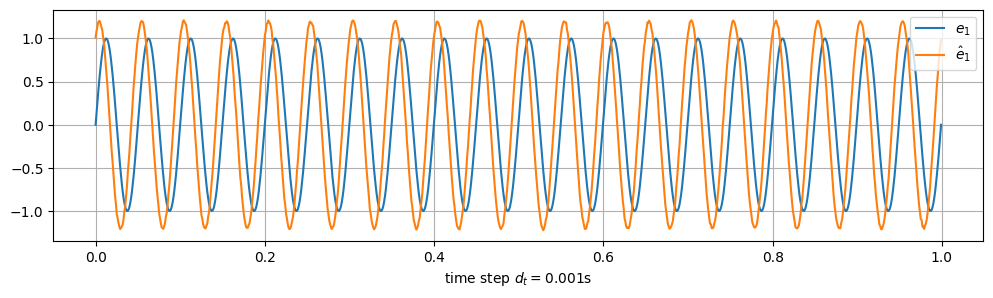

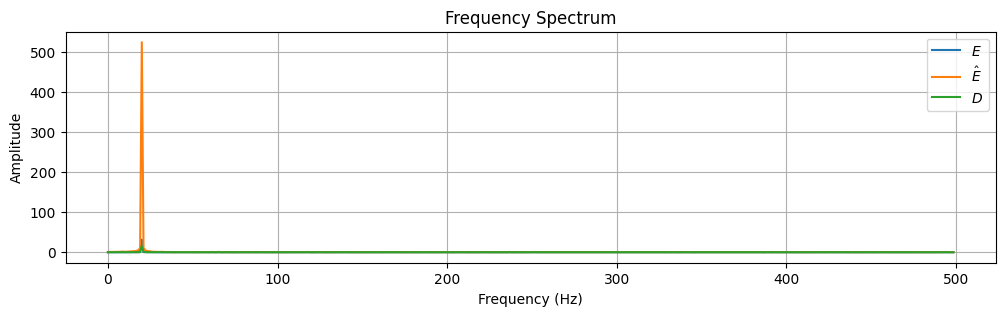

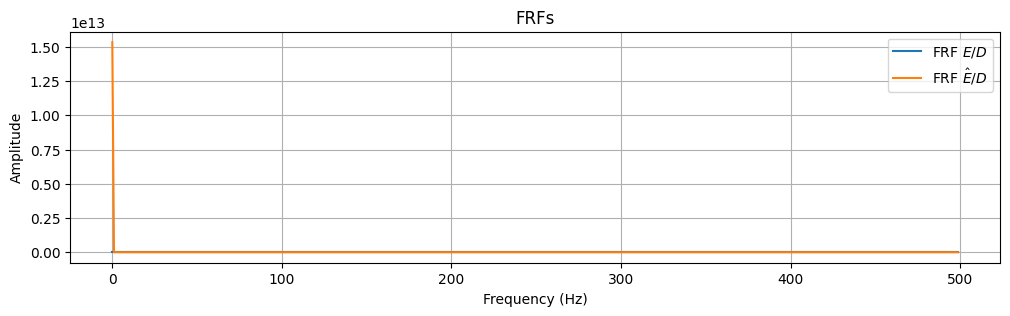

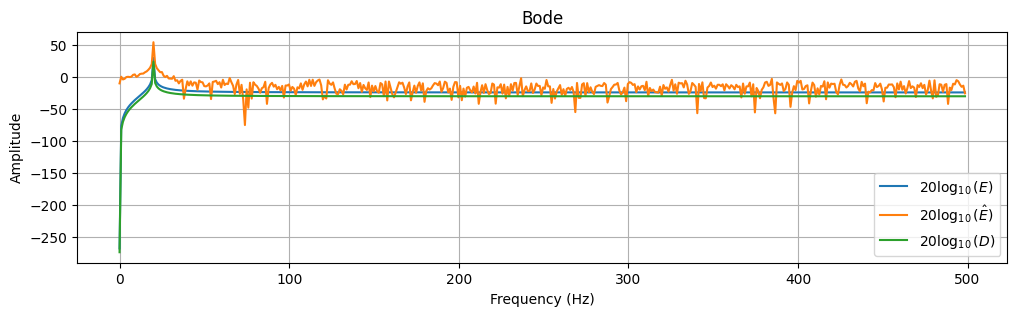

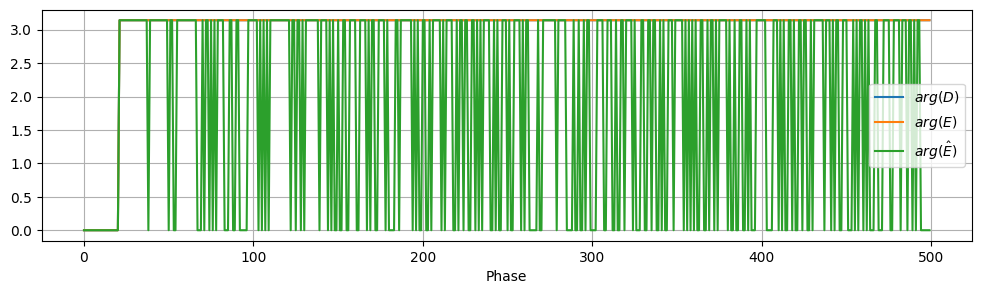

In [ ]:

t = np.linspace(0,1,N)
sin_ = lambda t, f, s=0: np.sin(2*np.pi*f*(t)+s)
cos_ = lambda t, f: np.cos(2*np.pi*f*t)

name = os.path.join(fig_rel_path,'phaseshift-model')

d = 0.5 * sin_(t,20)
e = 2*d
e_hat = 1.2*sin_(t,20, 1) + np.random.normal(0,1e-2,N)

print('--- Time domain ---')
plot_trajectories(e.reshape(-1,1),e_hat.reshape(-1,1), 1/N, name)
rmse(e_hat,e)



E, freqs = dft(e.reshape(-1,1))
D, _ = dft(d.reshape(-1,1))
E_hat, _ = dft(e_hat.reshape(-1,1))
plot_frfs(D,E,E_hat,freqs, name)

print('--- Frequency domain ---')
rmse(E,E_hat)

print('--- Bode ---')
rmse(20*np.log10(np.abs(E[:N//2])),20*np.log10(np.abs(E_hat[:N//2])))

(1000,)


/Users/jack/Documents/python_venv/crnn/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


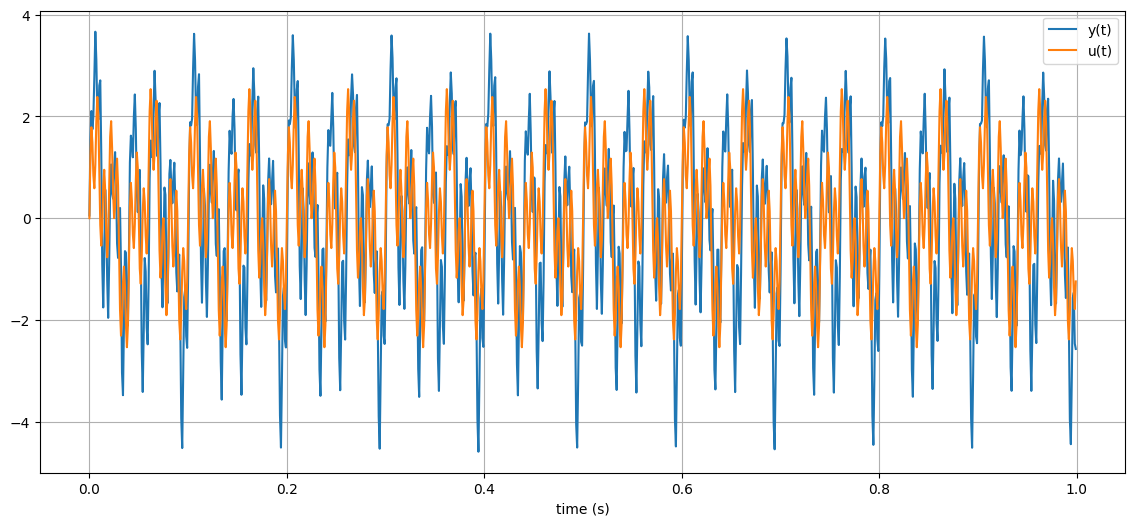

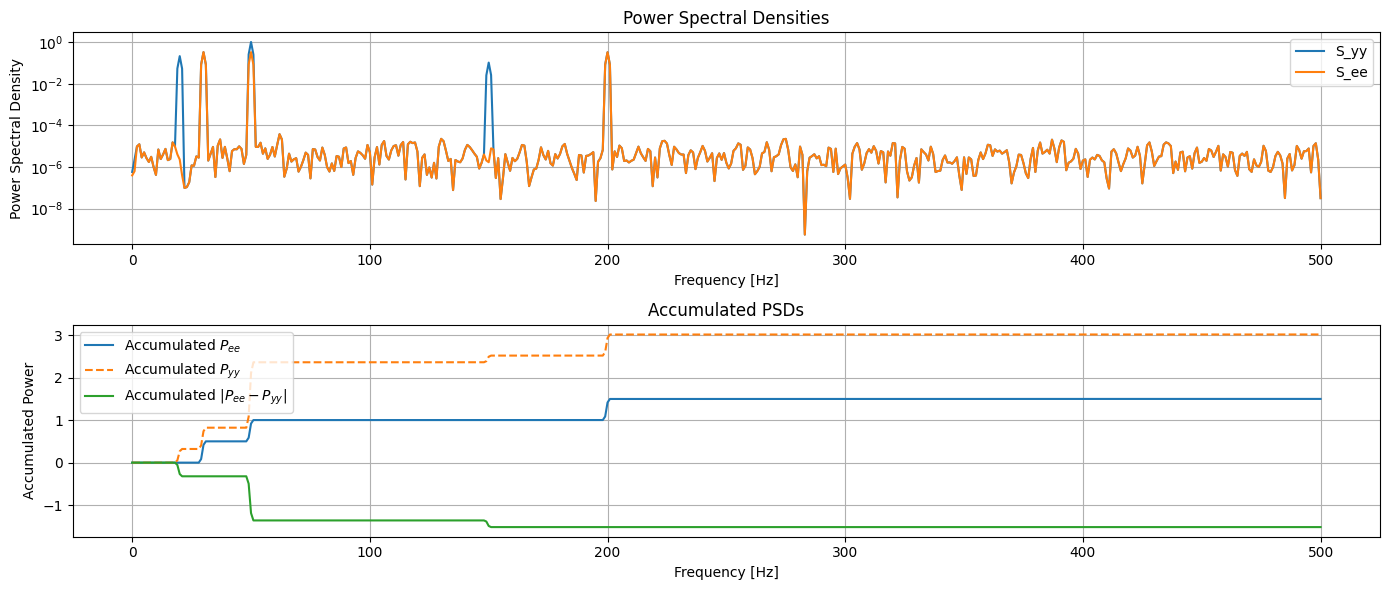

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, lfilter

# --- 1. Simulate a multisine input ---
fs = 1000  # Sampling frequency
T = 1      # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)
frequencies = [20, 50, 150]  # Multisine components
u = sum(np.sin(2 * np.pi * f * t) for f in frequencies)
print(u.shape)

# --- 2. Define a "true" nonlinear system ---
# Linear part: simple second-order system
b = [0.1, 0.2, 0.1]
a = [1, -0.8, 0.3]
y_linear = lfilter(b, a, u)

# Nonlinear part + noise
frequencies = [30, 50, 200]  # Multisine components
nonlinear_effect = sum(np.sin(2 * np.pi * f * t) for f in frequencies)
# nonlinear_effect = 0.01 * u**2
noise = 0.05 * np.random.randn(len(t))

# Total output
y = y_linear + nonlinear_effect + noise
e = y - y_linear  # Residual error

# --- 3. Compute PSDs ---
f, Puu = welch(u, fs, nperseg=1024)
_, Pyy = welch(y, fs, nperseg=1024)
_, Pyy_lin = welch(y_linear, fs, nperseg=1024)
_, Pee = welch(e, fs, nperseg=1024)
Pyy_linear = np.abs(np.fft.fft(b, len(Puu)))**2 * Puu  # Approximate linear part PSD

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(t,y, label='y(t)')
ax.plot(t,u, label='u(t)')
ax.set_xlabel('time (s)')
ax.grid()
ax.legend()

# Accumulated (integrated) PSDs
acc_Pee = np.cumsum(Pee) * (f[1] - f[0])
acc_Pyy = np.cumsum(Pyy) * (f[1] - f[0])

# --- 4. Plot ---
plt.figure(figsize=(14, 6))

# PSD plot
plt.subplot(2, 1, 1)
plt.semilogy(f, Pyy, label="S_yy")
plt.semilogy(f, Pee, label="S_ee")
# plt.semilogy(f, Pyy_lin,label="S_yy_lin")
# plt.semilogy(f, Puu, label="Input PSD (S_uu)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Densities")
plt.legend()
plt.grid(True)

# Accumulated error plot
plt.subplot(2, 1, 2)
plt.plot(f, acc_Pee, label=r"Accumulated $P_{ee}$")
plt.plot(f, acc_Pyy, label=r"Accumulated $P_{yy}$", linestyle='--')
plt.plot(f, acc_Pee - acc_Pyy, label=r'Accumulated $|P_{ee}-P_{yy}|$')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Accumulated Power")
plt.title("Accumulated PSDs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


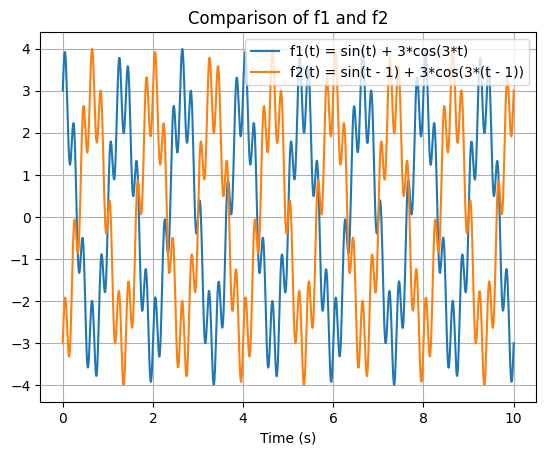

Quadratic error between f1 and f2 18.02
time step: 0.01001001001001001, frequency step: 99.9


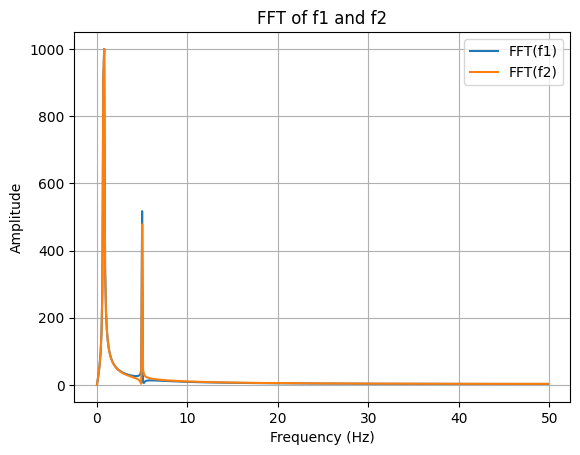

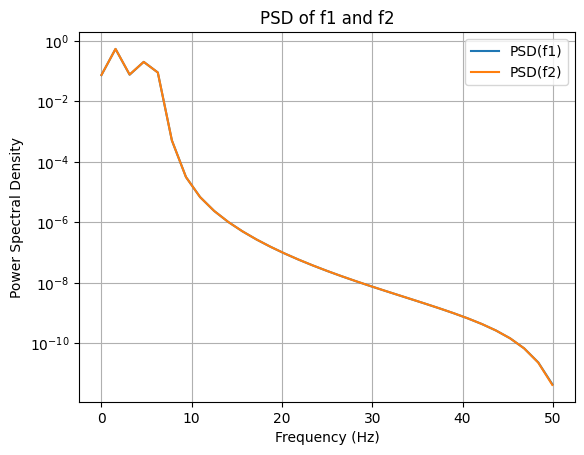

Quadratic error between PSD(f1) and PSD(f2): 5.893139909341823e-08


In [83]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
T = 10.0
t = np.linspace(0, T, N)
dt = T/(N-1)
f1 =lambda x: np.sin(2*np.pi*5*x) + 3*np.cos(0.1*np.pi*15*x)
f2 = lambda x: f1(x-2)

plt.plot(t, f1(t), label='f1(t) = sin(t) + 3*cos(3*t)')
plt.plot(t, f2(t), label='f2(t) = sin(t - 1) + 3*cos(3*(t - 1))')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.title('Comparison of f1 and f2')
plt.show()

print(f'Quadratic error between f1 and f2 {(np.mean((f1(t)-f2(t))**2)):.2f}')

plt.figure()

freqs = np.fft.fftfreq(N, d=dt)
plt.plot(freqs[:N//2], np.abs(np.fft.fft(f1(t)))[:N//2], label='FFT(f1)')
plt.plot(freqs[:N//2], np.abs(np.fft.fft(f2(t)))[:N//2], label='FFT(f2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of f1 and f2')
plt.grid()
plt.legend()

from scipy.signal import welch, lfilter

print(f'time step: {dt}, frequency step: {1/dt}')
f, S_ff1 = welch(f1(t), fs=1/dt, nperseg=64)
f, S_ff2 = welch(f2(t), fs=1/dt, nperseg=64)
plt.figure()
plt.semilogy(f, S_ff1, label='PSD(f1)')
plt.semilogy(f, S_ff2, label='PSD(f2)')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD of f1 and f2')
plt.grid()
plt.legend()
plt.show()

print(f'Quadratic error between PSD(f1) and PSD(f2): {np.mean((S_ff1-S_ff2)**2)}')

[ 0.          0.07758803  0.15517607  0.2327641   0.31035214  0.38794017
  0.46552821  0.54311624  0.62070428  0.69829231  0.77588035  0.85346838
  0.93105642  1.00864445  1.08623249  1.16382052  1.24140856  1.31899659
  1.39658463  1.47417266 -1.5517607  -1.47417266 -1.39658463 -1.31899659
 -1.24140856 -1.16382052 -1.08623249 -1.00864445 -0.93105642 -0.85346838
 -0.77588035 -0.69829231 -0.62070428 -0.54311624 -0.46552821 -0.38794017
 -0.31035214 -0.2327641  -0.15517607 -0.07758803]


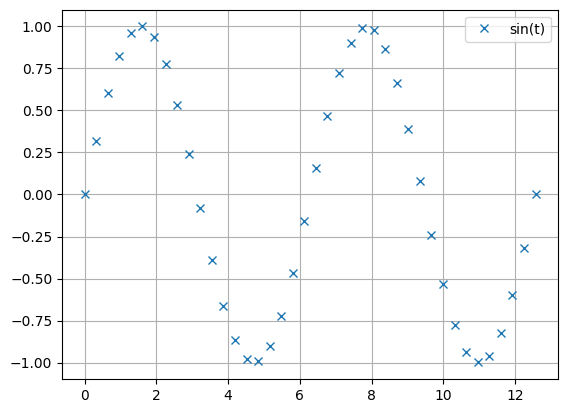

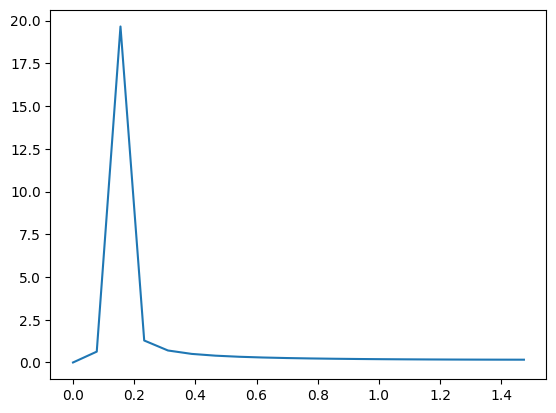

In [34]:
T = 4*np.pi
N = 40
t = np.linspace(0,T,N)
plt.plot(t, np.sin(t),'x', label='sin(t)')
plt.grid()
plt.legend()


f = np.fft.fftfreq(N, d=(t[1]-t[0]))
plt.figure()
plt.plot(f[:N//2],np.abs(np.fft.fft(np.sin(t)))[:N//2])
print(np.fft.fftfreq(N, d=(t[1]-t[0])))


# plt.plot(t,np.exp(-2*np.pi*1j*t/T)*np.sin(t))

In [ ]:
2*np.pi*0.1*15